import numpy and pandas


In [281]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [282]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

Chia frame và Tinh STE

In [283]:
import math as mth
def frameste(N,fs,npdata):
    frame_len = round(0.025*fs)
    num_frame = mth.floor(N/frame_len)
    k = 0
    frame = [0] * num_frame
    ste=[0] * num_frame
    for j in range (num_frame):
        frame[j] = [0] * frame_len
    for i in range(num_frame):
        frame[i] = npdata[k:frame_len+k]
        k +=frame_len
        ste[i]=sum(frame[i]*frame[i])
    ste=ste/max(ste)
    return ste,frame_len
#print(ste)  

Doc file 

In [284]:
import soundfile as sf
def readf(name):
    w = name+'.wav'
    l= './'+ name +'.lab'
    data, fs = sf.read(w)
    data
    N = len(data)
    npdata = np.array(data)
    file_lab = pd.read_csv(filepath_or_buffer= l, sep ='\t', header=None)
    file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
    file_lab = file_lab[(file_lab['start_time'] != 'F0mean')&(file_lab['start_time'] != ' F0std')]
    file_lab = file_lab.dropna()
    row_silent = file_lab[file_lab['detech'] == 'sil']
    start=row_silent['end_time']
    row_silent = file_lab[file_lab['detech'] == 'sil']
    end=row_silent['start_time']
    start=float(start.values[0])
    end=float(end.values[1])
    ste,frame_len=frameste(N,fs,npdata)
    starttime = start
    endtime =end
    return ste,starttime,endtime,npdata,fs,frame_len

Biên quyết định

Tách đoạn khoảng lặng và tiếng nói theo file lab

In [285]:
def sil(ste,start,end,num_frame):
    start=int(start/0.025)-1
    end=int(end/0.025)-1
#print(start," ",end)
    k=-1
    t=-1
    f = [0] * (end-start+1)
    g = [0] * (num_frame-len(f))
#print(len(f)," ",len(g)," ",len(ste))
    for i in range(len(ste)):
        if (i>=start)and(i<=end):    
            k+=1
            f[k]=ste[i]
        else:
            t+=1
            g[t]=ste[i]
    #print(f)
    return f,g    

Cost function

In [286]:
def cost_function(ste,f,g):
    j=len(ste)
    i=0.0001
    t=0
    while i<1:
        k=0
        for s in range(len(f)):
            if i>f[s]:
                k+=1
        for s in range(len(g)):
            if i<g[s]:
                k+=1
    #print(i," ",k)
        if k<=j:
            j=k
            t=i
        i+=0.0001
    #print(t)
    return t
#0.0006
#0.0021
#0.0026
#0.001
#T=(0.0006+0.0021+0.0026+0.001)/4
#0.0015749999999999998
#T2 = T
#print(T)


Hàm tính hiệu suất

In [287]:
def hs(ste,T2,f,g,num_frame):
    j=-1
    q=0
    count =0
    timesl = []
    for i in range(len(ste)-1):
        if ste[i]<T2 and ste[i+1]>T2 :
            if ste[i] in g : # g la khoang lang
                count +=1
            j=0
            timesl.append(i*0.025)
        elif ste[i] > T2 and ste[i+1]< T2 :
            if ste[i] in f :
                count +=1
            j=1
            timesl.append(i*0.025)
        else:
            if j==0:
                if ste[i] in g:
                    count +=1
            if j==1:
                if ste[i] in f:
                    count +=1
#tinh hieu xuat = (tong frame - so frame nham lan)/tong so frame * 100
    p =round( (num_frame - count)/ num_frame * 100,3)
    print(p,"%")
    print(timesl)
    return p,timesl

Hàm vẽ

In [288]:
def drawFrame(frame, frameSize, Fs, color, axs):
    wave = []
    for i in range(len(frame)):
        for j in range(frameSize):
            wave.append(frame[i])
    wave = np.asarray(wave)

    t1 = np.linspace(start = 0, stop = len(wave) / Fs, num = len(wave)) #Truc thoi gian x-axis

    axs.plot(t1, wave, color)

In [289]:
def paint(npdata,starttime,endtime,timesl,fs,name,ste,frame_len):
    npdata = npdata/abs(max(npdata))
    t_axis = np.linspace(start=0,stop=len(npdata), num = len(npdata))/fs
    fig,ax = plt.subplots(1,figsize=(18,7))
    ax.plot(t_axis,npdata)

    plt.axvline(starttime,color='blue') # ve bien sl theo lab
    plt.axvline(endtime,color='blue') # ve bien sl theo lab
    k=0
    for j in timesl :
        plt.axvline(j,color='#8a2be2')# ve tat ca bien danh duoc
        if k==0:
            plt.text(j, min(npdata), r'V', fontsize=10)
            k=1
        else:
            k=0
            plt.text(j, min(npdata), r'S', fontsize=10)
    drawFrame(ste,frame_len,fs,'#a52a2a',ax)
    plt.title(name, loc = 'center')
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning:

85.271 %
[0.5, 1.3250000000000002, 1.375, 1.675, 1.75, 1.7750000000000001, 1.8, 2.1750000000000003, 2.25, 2.325, 2.375, 2.5, 2.5500000000000003, 2.575, 2.6, 2.725, 2.8000000000000003, 2.825, 3.125]


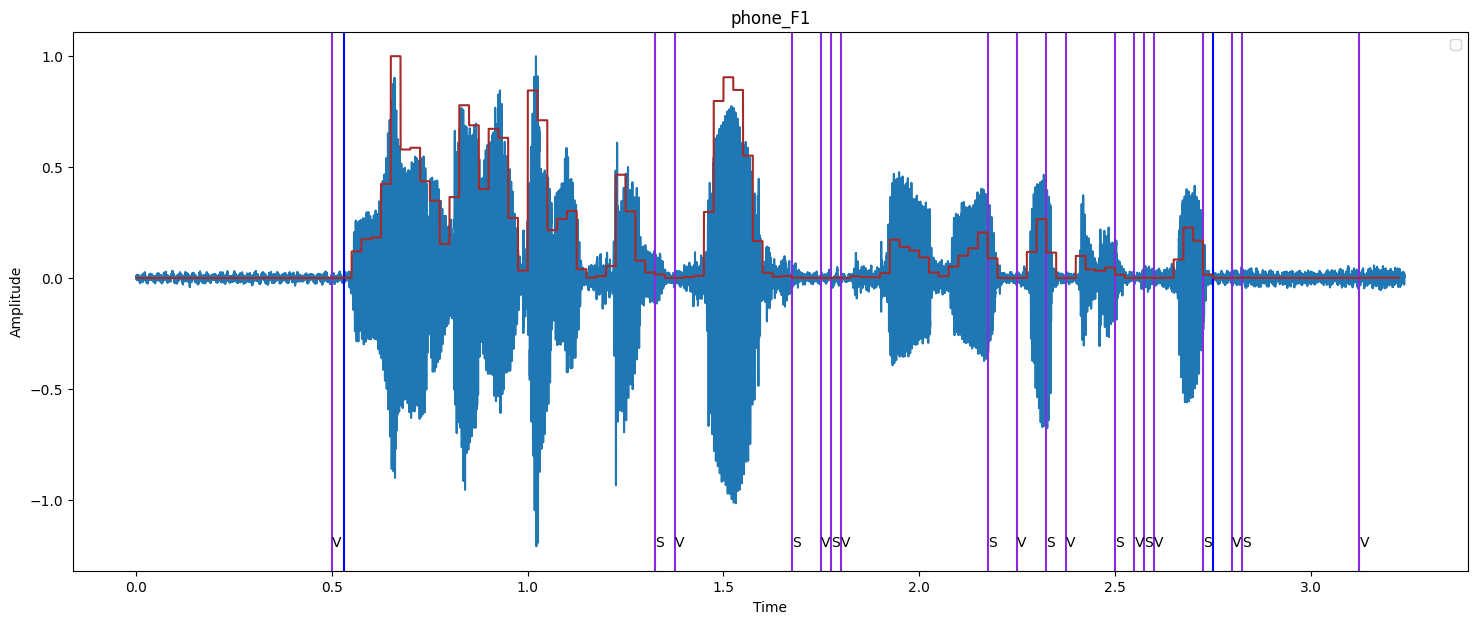

C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


98.193 %
[0.42500000000000004, 2.7750000000000004, 2.8000000000000003, 3.5500000000000003]


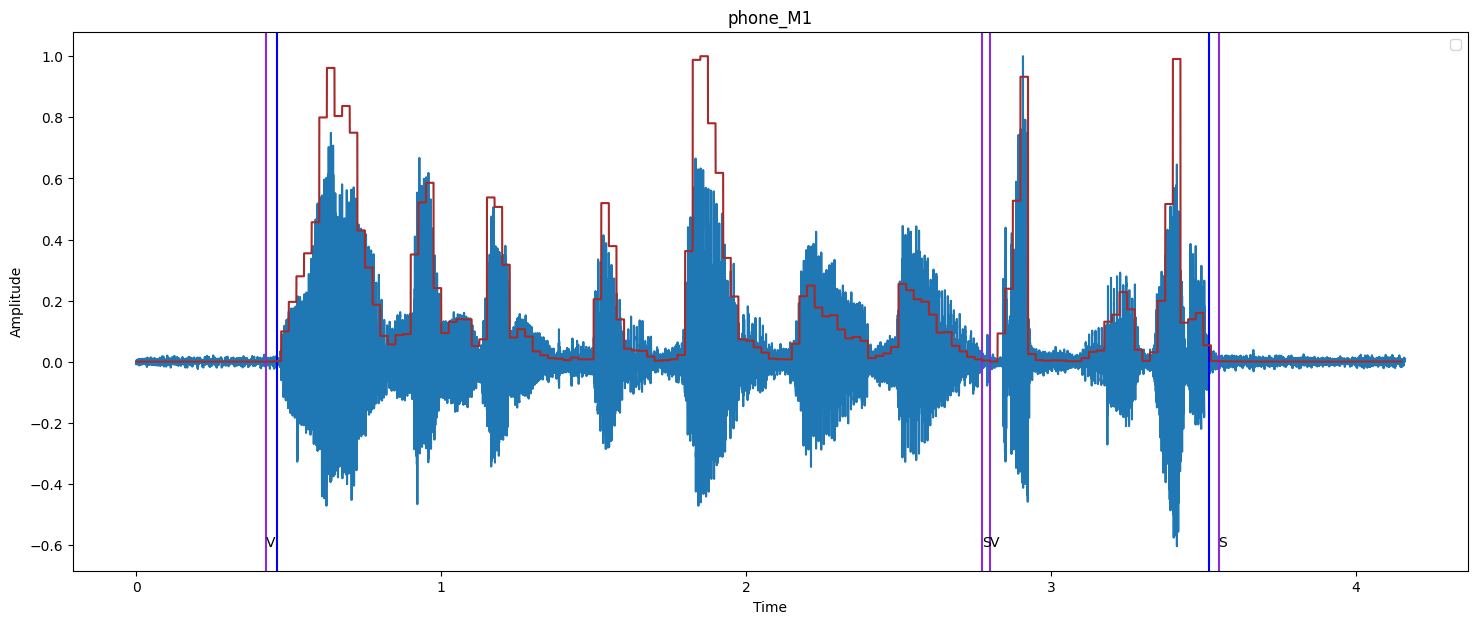

C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


97.368 %
[0.65, 1.2000000000000002, 1.225, 1.8250000000000002, 1.875, 2.125]


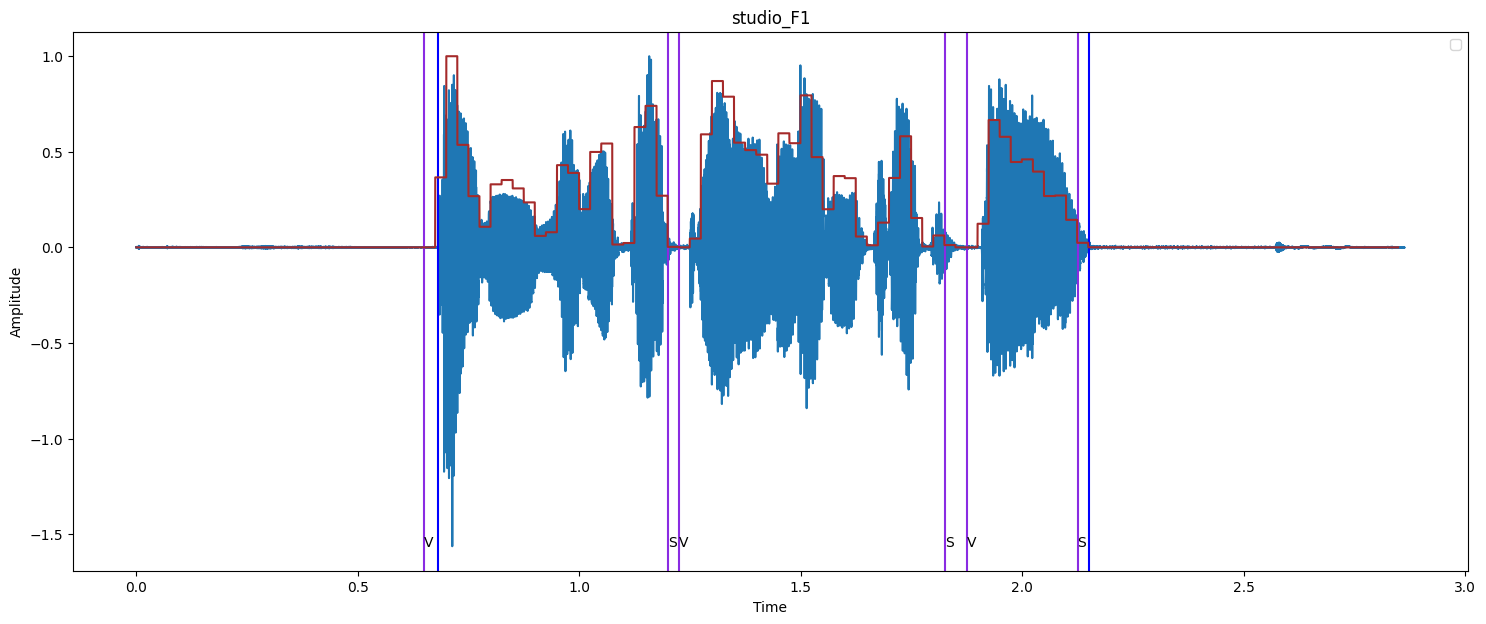

C:\Users\pc\AppData\Local\Temp\ipykernel_16992\2575852434.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  file_lab.set_axis(labels=['start_time','end_time', 'detech'], axis=1,inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


95.413 %
[0.8500000000000001, 0.875, 0.9, 1.7000000000000002, 1.7750000000000001, 2.025]


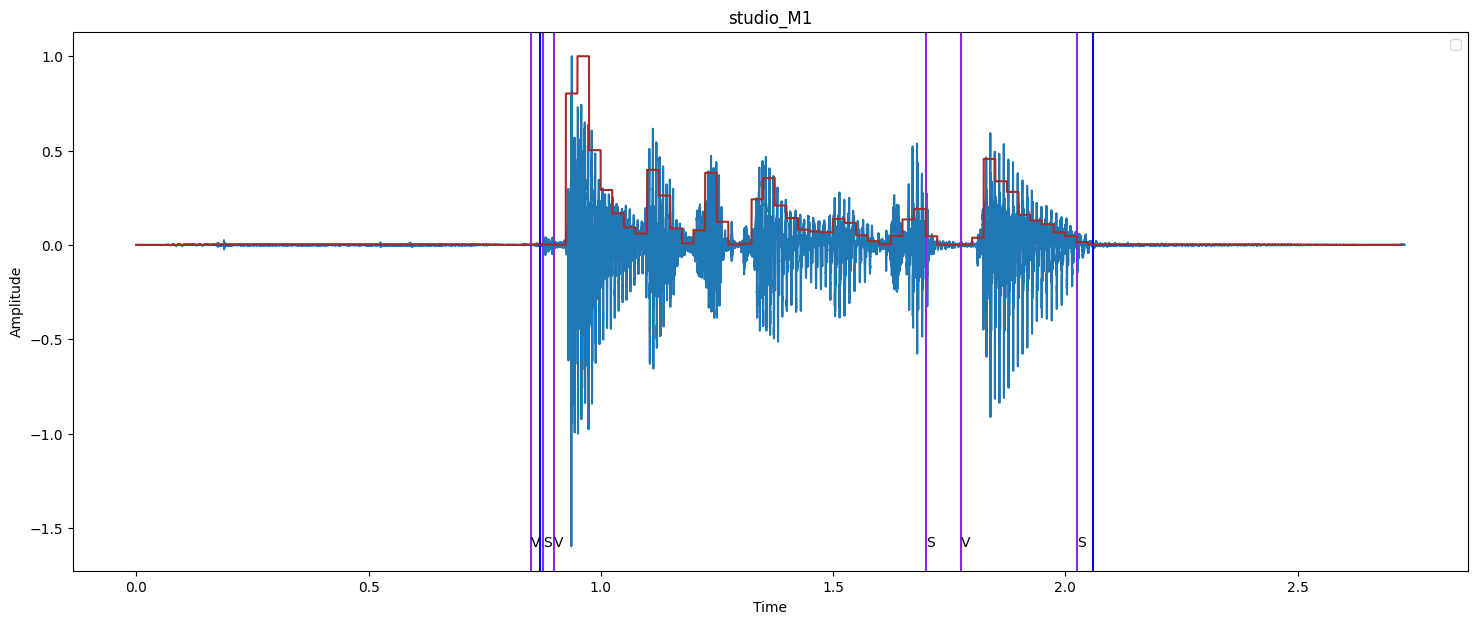

In [290]:
if __name__ =="__main__":
    Hl=["phone_F2", "phone_M2", "studio_F2", "studio_M2"]
    Kt=["phone_F1", "phone_M1", "studio_F1", "studio_M1"]
    T=0
    for i in range(len(Hl)):
        ste,starttime,endtime,npdata,fs,frame_len=readf(Hl[i])
        f,g=sil(ste,starttime,endtime,len(ste))
        T+=cost_function(ste,f,g)
    T/=4
    for i in range(len(Kt)):
        ste,starttime,endtime,npdata,fs,frame_len=readf(Kt[i])
        f,g=sil(ste,starttime,endtime,len(ste))
        p,timesl=hs(ste,T,f,g,len(ste))
        paint(npdata,starttime,endtime,timesl,fs,Kt[i],ste,frame_len)
        
        